In [3]:
library("cluster")
library("ggplot2")
library("factoextra")
library("magrittr")
library("NbClust")

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



ERROR: Error in library("NbClust"): there is no package called ‘NbClust’


# Dataset ‘file01.txt’:
-------------------------------------------------------------------
DATA DESCRIPTION:

Some minor planets may have been sighted more than once.  In the table, sightings thought to be of the same planet are listed together.

- Name is the year of sighting and the initials of the astronomer.

- Node is the angle, in the earth's plane of orbit, at which the minor planet crosses the earth's orbit. (degrees)

- Inclination is the angle between the orbits of the earth and the minor planet. (degrees)

- Axis is the maximum distance between the minor planet and the sun, divided by the corresponding quantity for the earth. (astronomic units)
--------------------------------------------------------------------------------

- Find the optimal number of clusters.

- Carry out the procedure of data clustering by the k-means method. Graph the results.

- Output information about which cluster each observation fell into.

- Perform the k-means clustering procedure using a different metric for determining the distance between clusters.



In [4]:
process_data <- function(data) {
  # Удаляем строки с NA
  cleaned_data <- na.omit(data)
  
  
  # Масштабируем данные
  scaled_data <- scale(cleaned_data) %>% as.data.frame()
  
  # Возвращаем результат
  return(scaled_data)
}


In [5]:
read.table('../data/file01.txt',header = TRUE,
           na.strings = 'NA',row.names = 1,dec='.') -> astrodata

head(astrodata, n=2)

astrodata = process_data(astrodata)
head(astrodata, n=2)


,Node,Inclination,Axis
,<dbl>,<dbl>,<dbl>
1935RF,130.916,4.659,2.2562
1941FD,132.200,4.700,2.1300


,Node,Inclination,Axis
,<dbl>,<dbl>,<dbl>
1935RF,-0.006121102,-0.3313460,-0.9671205
1941FD,0.009216861,-0.3222848,-1.2719743


In [72]:
astrodata

,Node,Inclination,Axis
,<dbl>,<dbl>,<dbl>
1935RF,-0.006121102,-0.33134600,-0.9671205
1941FD,0.009216861,-0.32228476,-1.2719743
1955QT,-0.016226956,-0.30239423,-1.1287268
1940YL,2.471569133,2.34591947,0.2172677
1953NH,2.487002659,2.18988930,0.1858644
1930SY,-0.604731694,-0.33952322,-1.1294515
1949HM,-0.604731694,-0.33952322,-1.1255865
1929EC,-0.195384875,-0.77181076,1.2344937
1948RO,-0.496075844,-0.89690010,1.6751064


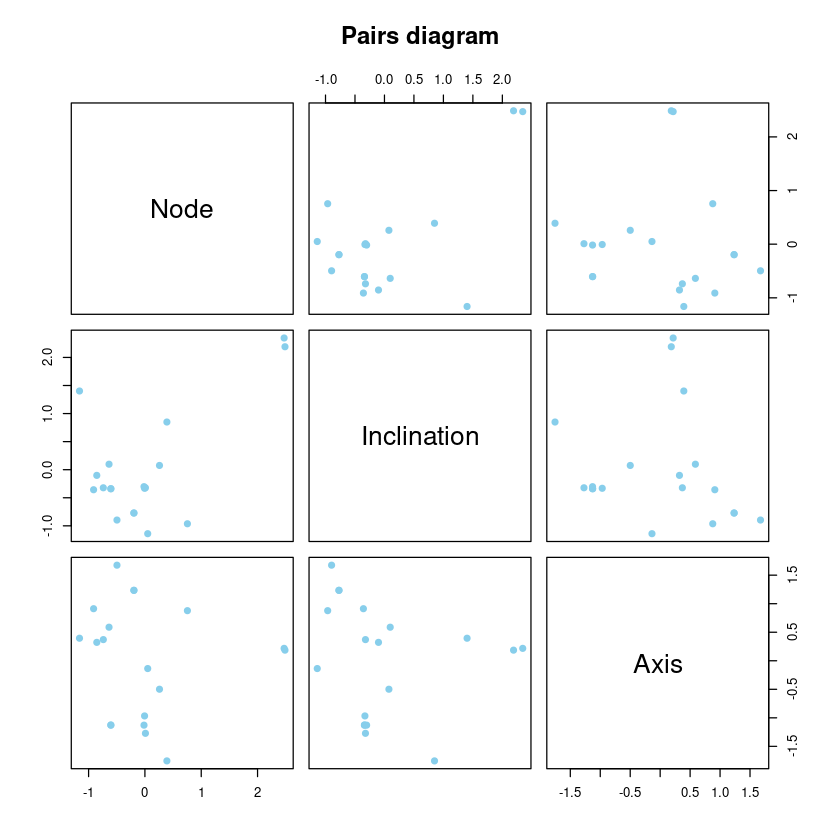

In [62]:
pairs(astrodata, 
      main = "Pairs diagram",
      pch = 19, col = "skyblue")


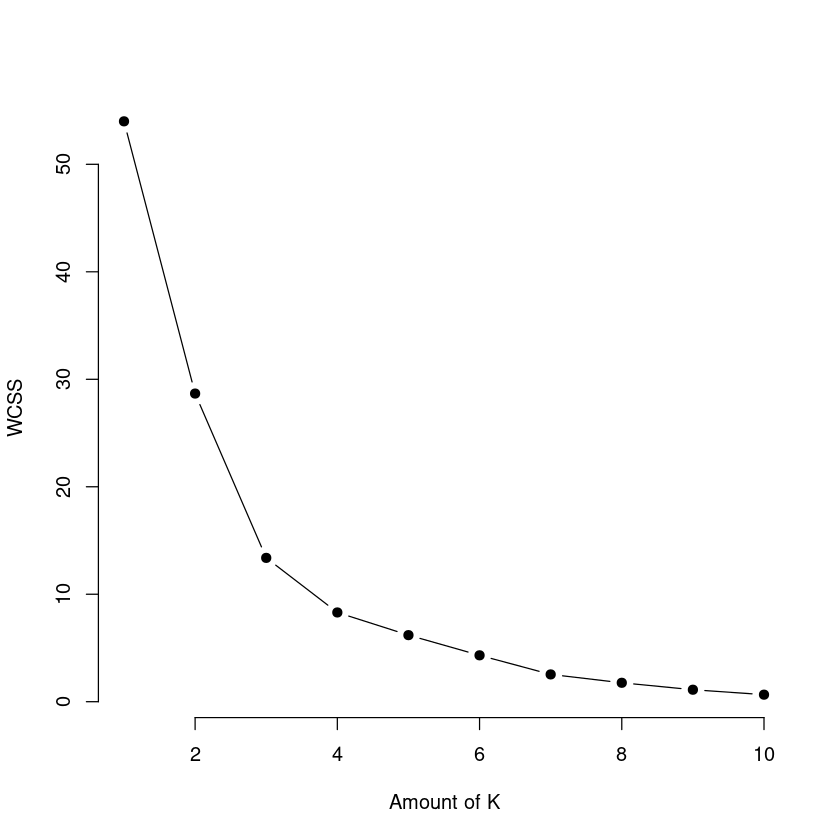

In [6]:
# Устанавливаем максимальное число кластеров
max_clusters <- 10
wcss <- numeric(max_clusters)  # Вектор для хранения значений WCSS

# Цикл для расчёта WCSS при разном количестве кластеров K
for (k in 1:max_clusters) {

    kmeans_result <- kmeans(astrodata, centers = k, nstart = 25) #25 times
    wcss[k] <- kmeans_result$tot.withinss  # Сохраняем значение total WCSS
}

# Построение графика
plot(1:max_clusters, wcss, type = "b", pch = 19, frame = FALSE,
     xlab = "Amount of K",
     ylab = "WCSS",
)

according this method we should make 4 clusters

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.
ℹ The deprecated feature was likely used in the factoextra package.
  Please report the issue at <https://github.com/kassambara/factoextra/issues>.”


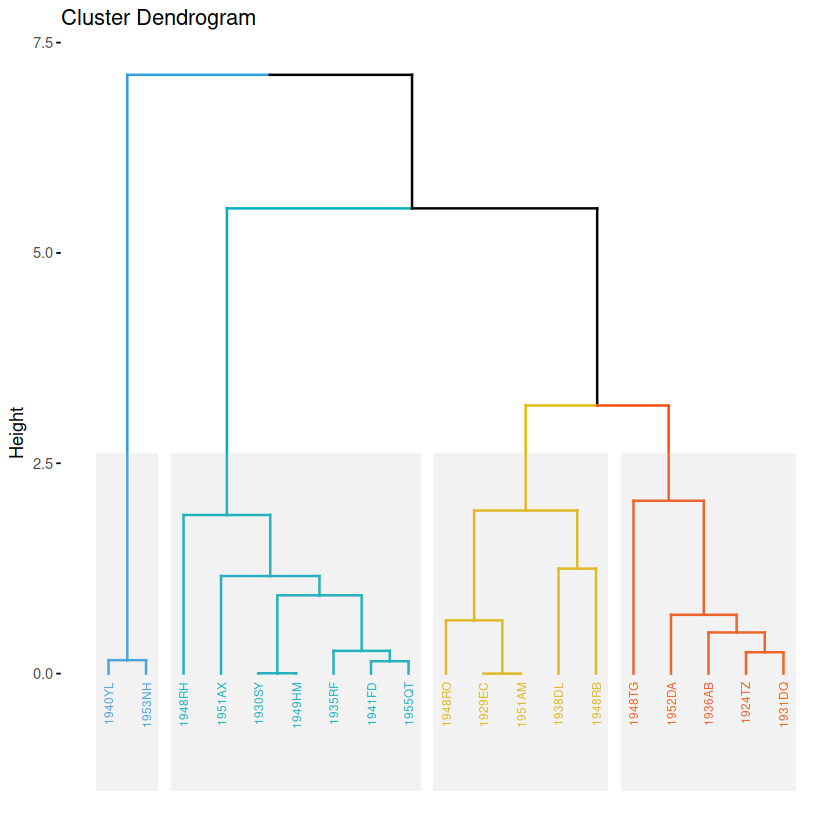

In [7]:
# Compute hierarchical clustering
res.hc <- astrodata %>%
  dist(method = "euclidean") %>% # Compute dissimilarity matrix
  hclust(method = "ward.D2")     # Compute hierachical clustering
# Visualize using factoextra
# Cut in 4 groups and color by groups
fviz_dend(res.hc, k=4,# Cut in four groups
          cex = 0.5,# label size
          k_colors = c("#2E9FDF", "#00AFBB", "#E7B800", "#FC4E07"),
          color_labels_by_k = TRUE, # color labels by groups
          rect = TRUE # Add rectangle around groups
          ,repel = T,
          rect_fill = T
          )

In [8]:
fir = kmeans(astrodata, centers = 10, nstart = 25) %>%
fviz_cluster(., data = astrodata,
             ellipse.type = "convex",
             palette = "jco",
             ggtheme = theme_minimal())+
  labs(subtitle = "K-means algorithm ")

str(fit)
fit$cluster

ERROR: Error: object 'fit' not found


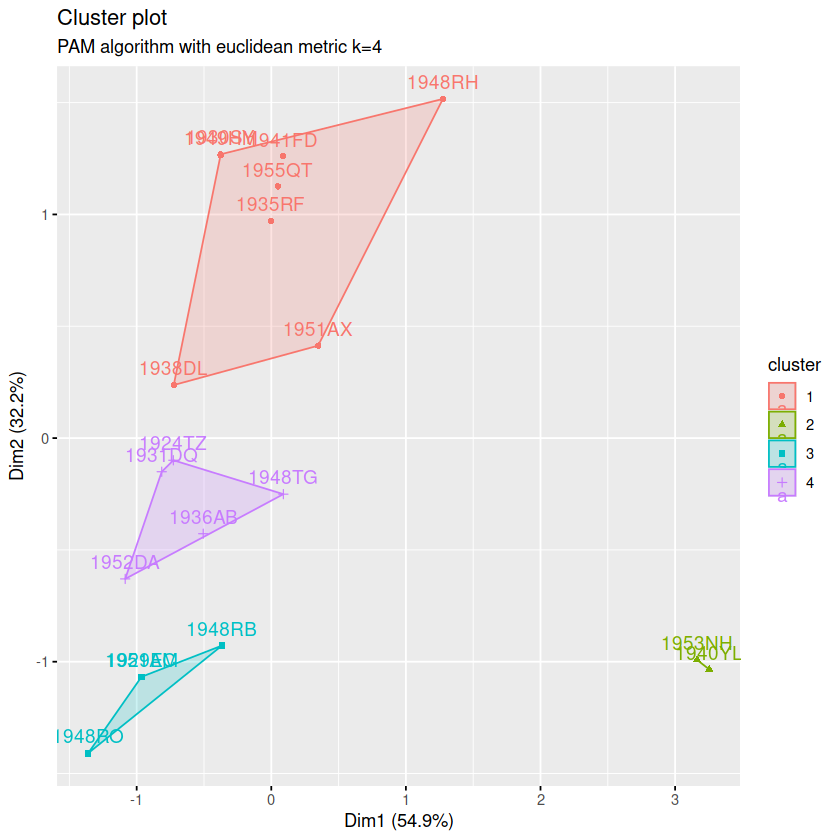

In [9]:
# Compute PAM
fit = astrodata %>%
  pam(., k = 4,metric = "euclidean") 
# Visualize
fviz_cluster(fit)+
  labs(subtitle = "PAM algorithm with euclidean metric k=4 ")

In [11]:
aggregate(astrodata, by=list(fit$cluster), FUN=mean)
astrodata = data.frame(astrodata, fit$cluster)

Group.1,Node,Inclination,Axis
<int>,<dbl>,<dbl>,<dbl>
1,-0.06545119,-0.2313132,-1.0016944
2,2.47928590,2.2679044,0.2015661
3,-0.03305810,-0.8509309,1.2555098
4,-0.86054598,0.1436841,0.5176767


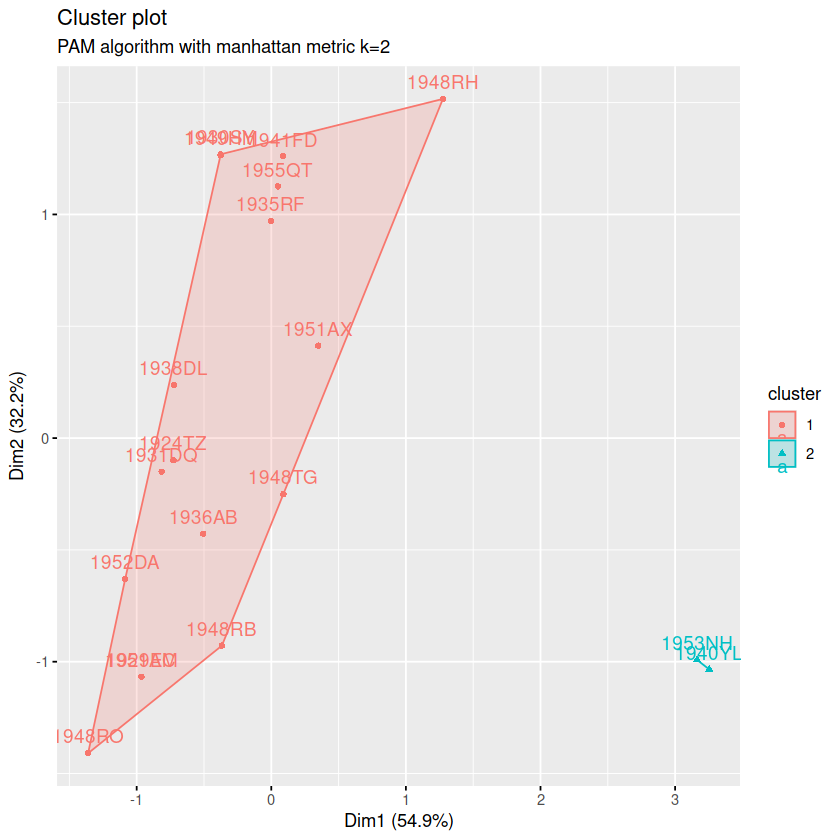

In [88]:
# Compute PAM
file01.data %>%
pam(., 2,metric = "manhattan") %>%
# Visualize
fviz_cluster()+
  labs(subtitle = "PAM algorithm with manhattan metric k=2 ")

In [41]:
library("NbClust")
res.nbclust <- file01.data %>%
  scale() %>%
  NbClust(distance = "manhattan",
          min.nc = 2, max.nc = 10,
          method = "kmeans", index ="all")

ERROR: Error in library("NbClust"): there is no package called ‘NbClust’


# Dataset ‘file02.txt’:
-------------------------------------------------------------------
DATA DESCRIPTION:

A list of animals, and the constituents of their milk.

- Name is the animal.

- Water is the percentage of water. (%)

- Protein is the percentage of protein. (%)
  
- Fat is the percentage of fat. (%)

- Lactose is the percentage of lactose. (%) 
--------------------------------------------------------------------------------

- Find the optimal number of clusters.

- Perform the hierarchical clustering procedure. Depict the results on a graph.

- Output information about which cluster each observation fell into.

- Perform the hierarchical clustering procedure using a different metric for determining the distance between clusters.



In [29]:
read.table('../data/file02.txt',header = TRUE,
           na.strings = 'NA',row.names = 1,dec='.') -> milk

head(milk, n=2)

,Water,Protein,Fat,Lactose
,<dbl>,<dbl>,<dbl>,<dbl>
Horse,90.1,2.6,1.0,6.9
Donkey,90.3,1.7,1.4,6.2


# Dataset ‘file07.txt’:
-------------------------------------------------------------------
DATA DESCRIPTION:

"Expectations of Life by Country, Age and Sex, Hartigan page 101"

- Country is the name of the country.

- Year is the year in which the data was computed.

- M0, M25, M50 and M75 are the remaining life expectancies for a male of ages 0, 25, 50 and 75.

- F0, F25, F50 and F75 are the remaining life expectancies for a female of ages 0, 25, 50 and 75.

--------------------------------------------------------------------------------

- Find the optimal number of clusters.

- Perform the data clustering procedure using k-means method. Depict the results in a graph.

- Output information about which cluster each observation fell into.

- Perform k-means clustering using a different metric for determining the distance between clusters.





In [31]:
read.table('../data/file07.txt',header = TRUE,
           na.strings = 'NA',dec='.') -> people

head(people, n=2)

,Country,Year,M0,M25,M50,M75,F0,F25,F50,F75
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Algeria,1965,63,51,30,13,67,54,34,15
2,Cameroon,1964,34,29,13,5,38,32,17,6
